In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy

In [2]:
df = pd.DataFrame(columns=["MovieId", "Rating" , "LReview", "Review"])

positive_files = glob.glob("aclImdb/test/pos/*")
print(len(positive_files))

negative_files = glob.glob("aclImdb/test/neg/*")
print(len(negative_files))

positive_files = positive_files[:200]
negative_files = negative_files[:200]

for i in positive_files:
    part = i[17:]
    rating = part[part.index('_')+1: part.index('.')]
    df.at[(part[:part.index('_')]), "Rating"] = int(rating)
    with open(i) as f:
        temp = f.read()
        df.at[(part[:part.index('_')]), "Review"] = temp
        df.at[(part[:part.index('_')]), "LReview"] = len(temp)
    
    
for i in negative_files:
    part = i[17:]
    rating = part[part.index('_')+1: part.index('.')]
    df.at[(part[:part.index('_')]), "Rating"] = int(rating)
    with open(i) as f:
        temp = f.read()
        df.at[(part[:part.index('_')]), "Review"] = temp
        df.at[(part[:part.index('_')]), "LReview"] = len(temp)
        
df["MovieId"] = df.index.values

df.sort_values(by=['Rating'], inplace=True)

df["MovieId"] = pd.to_numeric(df['MovieId'])

df["LReview"] = pd.to_numeric(df['LReview'])

df.head()

12500
12500


,MovieId,Rating,LReview,Review
10828,10828,1,552,"Right... so you have a dam, tons of water (tha..."
8908,8908,1,700,What a crap that movie is. The script is simpl...
2150,2150,1,623,This has got to be the worst case of over acti...
7736,7736,1,984,The message of Hero is quite clear: the idea o...
636,636,1,662,It is way beyond me how this script was ever s...


In [3]:
df.dtypes

MovieId     int64
Rating     object
LReview     int64
Review     object
dtype: object

Text(0, 0.5, 'Count')

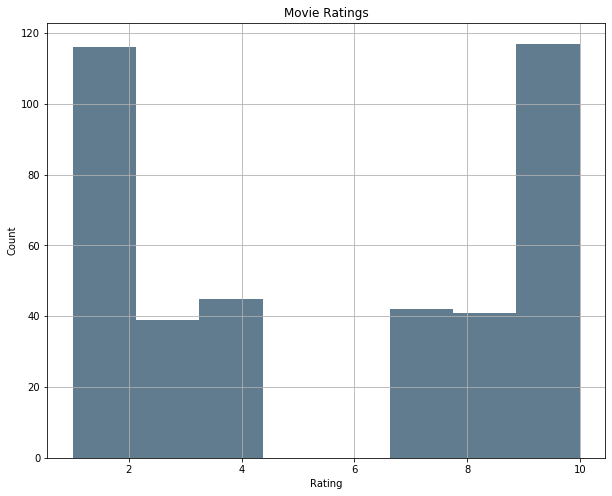

In [4]:
df["Rating"].plot.hist(grid=True, bins=len(df["Rating"].unique()), figsize=(10, 8), color='#607c8e')
plt.title('Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

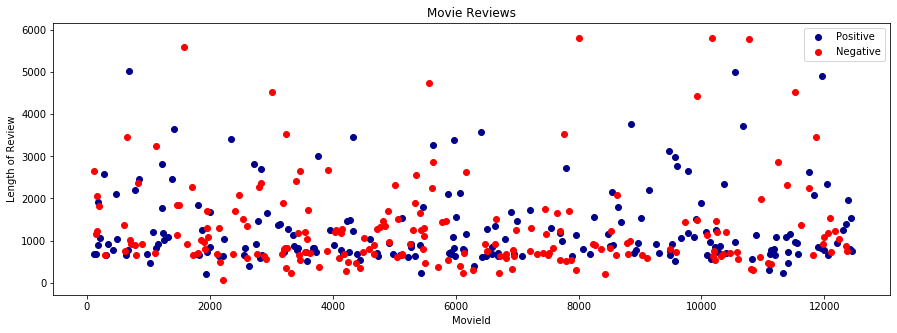

In [5]:
plt.figure(figsize=(15,5))
dfp = df[df["Rating"]<5]
dfn = df[df["Rating"]>5]

plt.title('Movie Reviews')
plt.xlabel('MovieId')
plt.ylabel('Length of Review')
plt.scatter(x=dfp["MovieId"], y=dfp["LReview"], c='DarkBlue', label='Positive' )
plt.scatter(x=dfn["MovieId"], y=dfn["LReview"], c='Red', label='Negative' )
plt.legend(loc="best")
plt.show()
